In [ ]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
API_key = '9076554c305ee5e47b536517a4aa399c'

countries = ['Jamaica', 'Indonesia', 'United States', "Turkey", 'Saudi Arabia', "Egypt", 'China']

country_name_list = []
maxtemp = []
mintemp = []
humidity = []
windspeed = []

In [ ]:
for country_names in countries:
    url = f'http://api.openweathermap.org/data/2.5/weather?q={country_names}&APPID={API_key}&units=imperial'
    r = requests.get(url)
    data = r.json()
    
    formatted_json = json.dumps(data, sort_keys = True, indent = 4)
    
    country_name_list.append(data['name'])
    maxtemp.append(data['main']['temp_max'])
    mintemp.append(data['main']['temp_min'])
    humidity.append(data['main']['humidity'])
    windspeed.append(data['wind']['speed'])
    

In [ ]:
df = pd.DataFrame()
df['Names'] = country_name_list
df['Max_Temp'] = maxtemp
df['Min_temp'] = mintemp
df['Humidity'] = humidity
df['WindSpeed'] = windspeed

df.head()

# Shorter

In [14]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

API_key = '9076554c305ee5e47b536517a4aa399c'
countries = ['Jamaica', 'Indonesia', 'United States', 'Turkey', 'Saudi Arabia', 'Egypt', 'China']

df = pd.DataFrame([
    {
        'Names': data['name'],
        'Max_Temp': data['main']['temp_max'],
        'Min_Temp': data['main']['temp_min'],
        'Humidity': data['main']['humidity'],
        'WindSpeed': data['wind']['speed']
    }
    for country_names in countries
    if (data := requests.get(f'http://api.openweathermap.org/data/2.5/weather?q={country_names}&APPID={API_key}&units=imperial').json())
])

df.head()


,Names,Max_Temp,Min_Temp,Humidity,WindSpeed
0,Jamaica,81.30,81.30,66,7.29
1,Indonesia,72.34,72.34,94,3.69
2,United States of America,43.41,43.41,36,2.89
3,Turkey,45.32,45.32,43,3.31
4,Saudi Arabia,71.58,71.58,39,8.39


In [15]:
df.describe()

,Max_Temp,Min_Temp,Humidity,WindSpeed
count,7.000000,7.000000,7.000000,7.000000
mean,64.674286,63.747143,58.714286,6.605714
std,14.686937,14.873970,20.942097,4.234839
min,43.410000,43.410000,36.000000,2.890000
25%,55.110000,51.865000,41.000000,3.500000
50%,71.580000,71.580000,61.000000,5.700000
75%,73.105000,73.105000,69.000000,7.840000
max,81.300000,81.300000,94.000000,14.970000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Names      7 non-null      object 
 1   Max_Temp   7 non-null      float64
 2   Min_Temp   7 non-null      float64
 3   Humidity   7 non-null      int64  
 4   WindSpeed  7 non-null      float64
dtypes: float64(3), int64(1), object(1)
memory usage: 412.0+ bytes


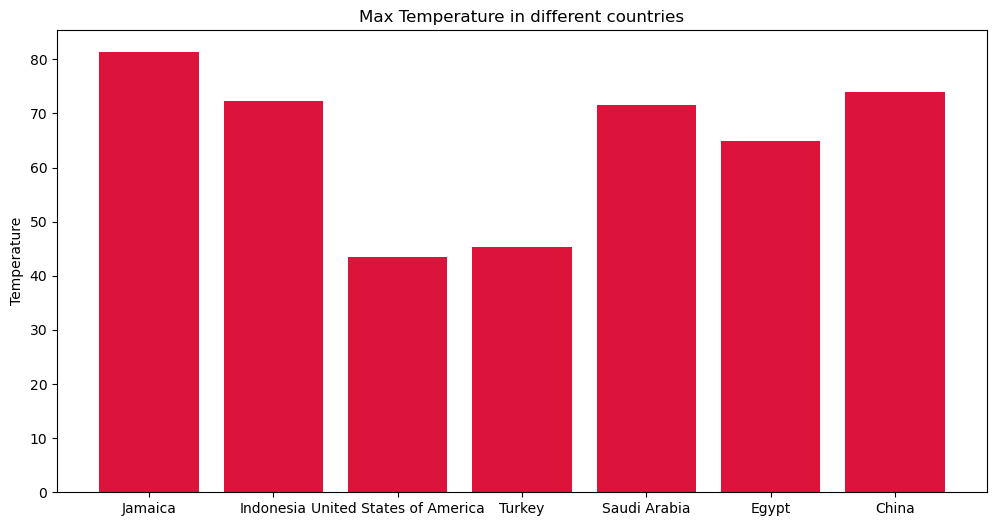

In [17]:
plt.figure(figsize=(12, 6))
plt.bar(df['Names'], df['Max_Temp'], color='crimson')  
plt.title("Max Temperature in different countries")
plt.ylabel('Temperature')
plt.show()


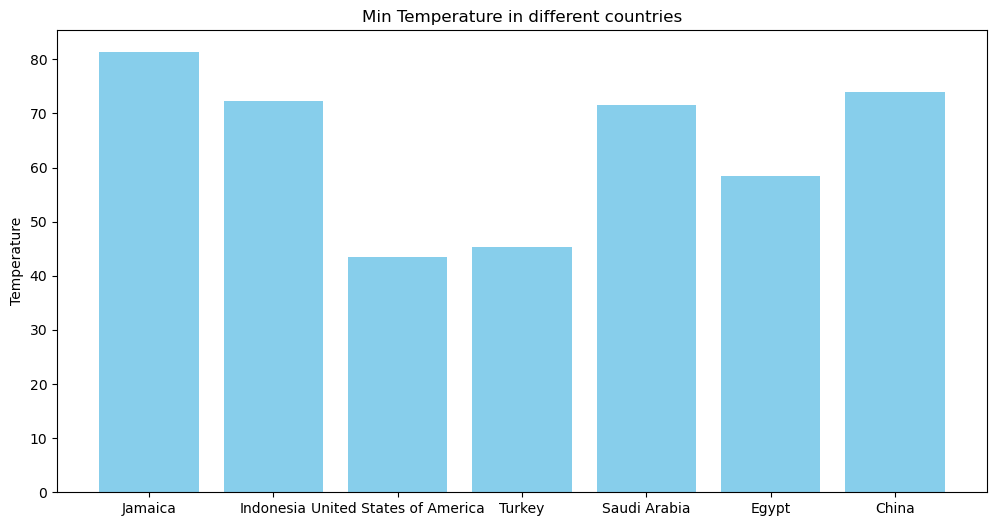

In [18]:
plt.figure(figsize=(12, 6))
plt.bar(df['Names'], df['Min_Temp'], color='skyblue')  
plt.title("Min Temperature in different countries")
plt.ylabel('Temperature')
plt.show()


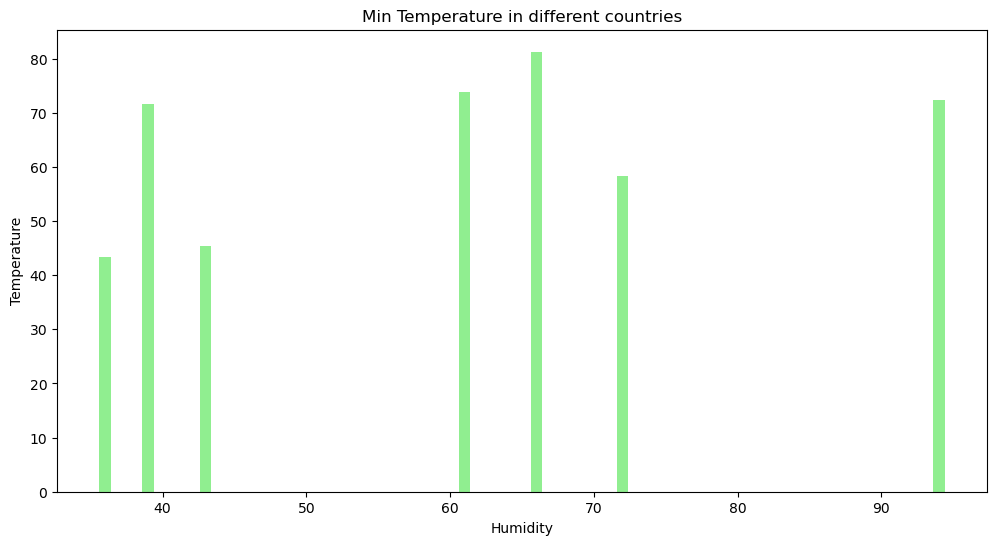

In [19]:
plt.figure(figsize=(12, 6))
plt.bar(df['Humidity'], df['Min_Temp'], color='lightgreen')  
plt.title("Min Temperature in different countries")
plt.ylabel('Temperature')
plt.xlabel('Humidity')
plt.show()
